In [1]:
# Imports
import numpy as np;
import matplotlib.pyplot as plt;
import time;

import geoutils as gu;

In [2]:
def generate_ray(origin, var = 0.1):
    y = np.random.normal(scale = var);
    current_ray_direction = np.array([1,y]);
    
    return (origin, current_ray_direction);


In [3]:
 '''
Function that refracts a ray through a lens. 

The 3-tuple for ray_in describes the incoming ray via the linear eqaution y = a_1*(x-x_1) + y_1

The 3-tuples lens_l and lens_r describe respectively the left and right side of the lenses via the circles 
(x-x_i)**2 + (y-y_i)**2 = r_i**2, i in {l,r}.

We assume that the ray propagates in the positive x-direction.
'''
def propagate_ray(ray, ld, lf): #ray, distance of lens, focal distance of lens
    x0 = ray[0][0]
    y0 = ray[0][1]
    a0 = ray[1][1]
    
    d1 = x0-y0/a0
    yd = a0*(ld-x0)+y0
    
    d2 = 1.0/(1.0/(ld-d1)-1.0/lf)
    
    x1 = ld
    y1 = yd
    a1 = -yd/(d2-ld)
    
    refracted_ray_origin = np.array([x1, y1])
    refracted_ray_direction = np.array([1, -a1])
    
    return (refracted_ray_origin, refracted_ray_direction)

In [4]:
box_min = np.array([40,-40]);
box_max = np.array([120,40]);
box_size = 80.0;

def discretize_ray(ray):
    box_intersection = gu.ray_box_intersection(ray[0],ray[1], box_min, box_max);
    if(len(box_intersection) == 2):
        begin = np.array([float(box_intersection[0][0]),float(box_intersection[0][1])]);
        end = np.array([float(box_intersection[1][0]),float(box_intersection[1][1])]);
        begin_transformed = (begin - box_min)/box_size;
        end_transformed = (end - box_min)/box_size;
        return gu.ray_grid_propagation(begin_transformed, end_transformed, N, 5);
    return np.zeros((N,N));
    


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: ComplexWarning: Casting complex values to real discards the imaginary part
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: ComplexWarning: Casting complex values to real discards the imaginary part
  if __name__ == '__main__':


32.20857238769531


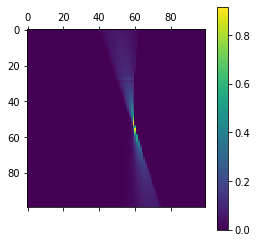

In [17]:
t0 = time.time();

N = 100;
A = np.zeros((N,N));

ray_count = 10000;
for i in range(0, ray_count):
    current_ray = generate_ray(np.array([-5,-5]), var = 0.2);
    current_ray = propagate_ray(current_ray, lens_l = [25, 0, 20], lens_r = [-10, 0 ,20], n_air = 1.0, n_lens = 1.65);
    current_ray = propagate_ray(current_ray, lens_l = [55, 0, 20], lens_r = [20, 0 ,20], n_air = 1.0, n_lens = 1.65);
    A_sub = discretize_ray(current_ray);
    A = A + A_sub;

A = A/ray_count;
plt.matshow(A);
plt.colorbar();

t1 = time.time();

total = t1-t0;
print(total);

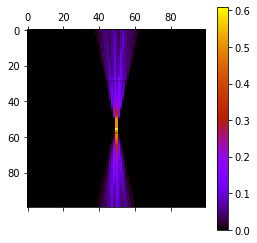

In [16]:
plt.matshow(A, cmap = 'gnuplot');
plt.colorbar();
plt.savefig('off-axis_test.png', dpi = 1000);